# Подержанные автомобили

Датасет содержит информацию о характеристиках и ценах подержанных автомобилей в некоторой стране

## Импорт библиотек, константы

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 42

In [ ]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/cars.csv"

## Загрузка и обзор данных

### Загрузка

In [ ]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [ ]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [ ]:
# случайные три записи из датасета
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2301,Maruti Swift AMT ZXI,2018,600000,69779,Petrol,Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
4135,Tata New Safari DICOR 2.2 EX 4x2,2011,300000,120000,Diesel,Individual,Manual,Second Owner,11.57 kmpl,2179 CC,138.1 bhp,320Nm@ 1700-2700rpm,7.0
4474,Maruti Ertiga SHVS ZDI Plus,2017,850000,43000,Diesel,Individual,Manual,First Owner,24.52 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,7.0


In [ ]:
# размер датасета
df.shape

(6999, 13)

In [ ]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0


In [ ]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

## Предобработка

Нужно привести к числовым стобцы mileage, engine, max_power; заполнить пропуски в них же + seats.

In [ ]:
mean = df['seats'].mean()
df['seats'].fillna(int(mean), inplace=True)

In [ ]:
# for i in range(6999):
#   if type(df['mileage'][i]) == str:
#     a = df['mileage'][i].split()
#     df['mileage'][i] = float(a[0])
#   if type(df['engine'][i]) == str:
#     a = df['engine'][i].split()
#     df['engine'][i] = float(a[0])
#   if type(df['max_power'][i]) == str:
#     a = df['max_power'][i].split()
#     if len(a) == 1:
#       df['max_power'][i] = None
#     else:
#       df['max_power'][i] = float(a[0])

In [ ]:
# mean = df['mileage'].mean()
# df['mileage'].fillna(mean, inplace=True)
# mean = df['engine'].mean()
# df['engine'].fillna(mean, inplace=True)
# mean = df['max_power'].mean()
# df['max_power'].fillna(mean, inplace=True)


In [ ]:
preprocess_func = lambda x: float(x.split()[0]) if isinstance(x, str) and x[0].isdigit() else None

for column in ['mileage', 'engine', 'max_power']:
    df[column] = df[column].apply(preprocess_func)
    mean = df[column].notna().mean()
    df[column].fillna(mean, inplace=True)

In [ ]:
df['torque'].fillna("unknown", inplace=True)

In [ ]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

* Все пропуски заполнены средними значениями
* Torque не получилось обобщенно предобработать, так как при приведении типов вылазиет очень много частных случаев

## Исследование данных

<Axes: >

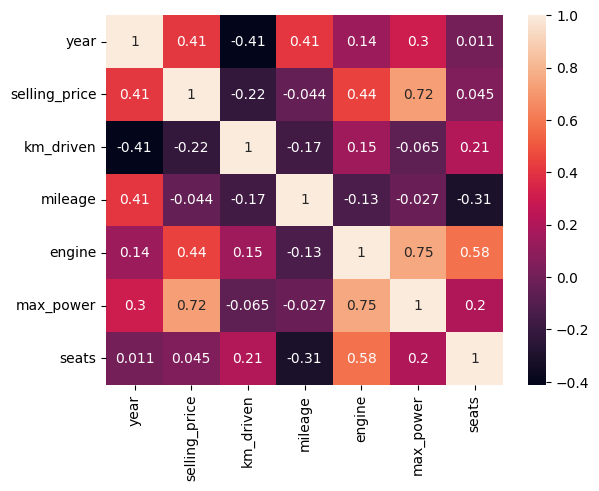

In [ ]:
# посмотрим на корреляцию
corr = df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
sns.heatmap(corr, annot=True)

Видим наибольшую взаимосвязь между ценой и мощностью, а также - годом выпуска, пробегом и типом двигателя.
У engine и max_power, а также у engine и seats высокий коэффициент корреляции (> 0.6) => возможна мультиколлинеарность

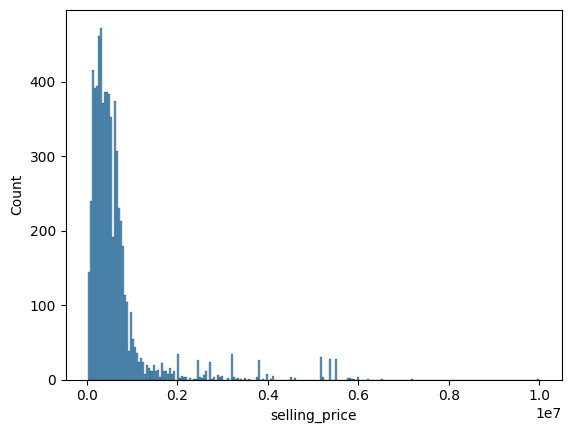

<Axes: xlabel='year', ylabel='Count'>

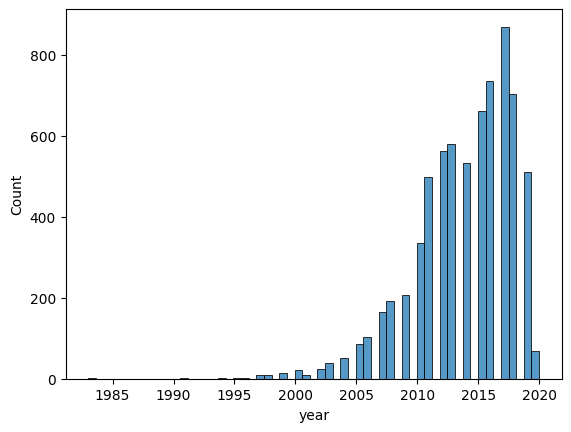

In [ ]:
sns.histplot(df['selling_price'])
plt.show()
sns.histplot(df['year'])

In [ ]:
df['year'].value_counts()[:10]

2017    870
2016    736
2018    704
2015    662
2013    581
2012    563
2014    532
2019    511
2011    499
2010    336
Name: year, dtype: int64

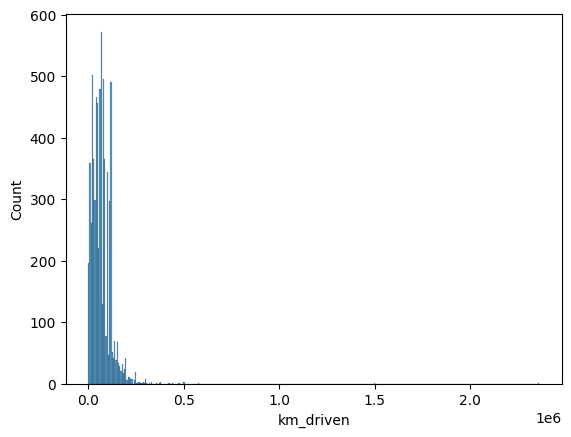

<Axes: xlabel='mileage', ylabel='Count'>

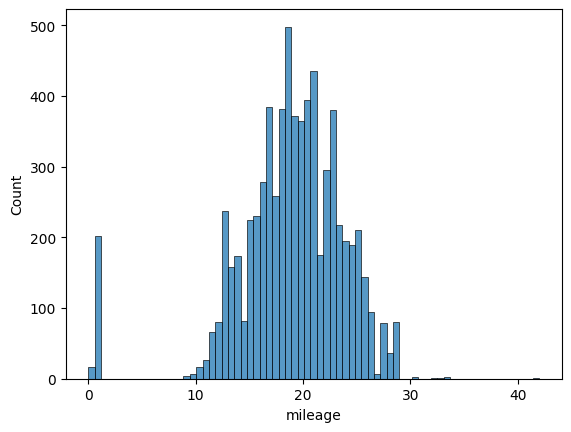

In [ ]:
sns.histplot(df['km_driven'])
plt.show()
sns.histplot(df['mileage'])

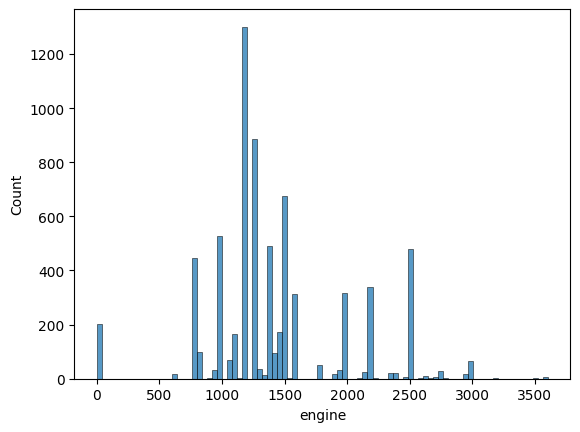

<Axes: xlabel='max_power', ylabel='Count'>

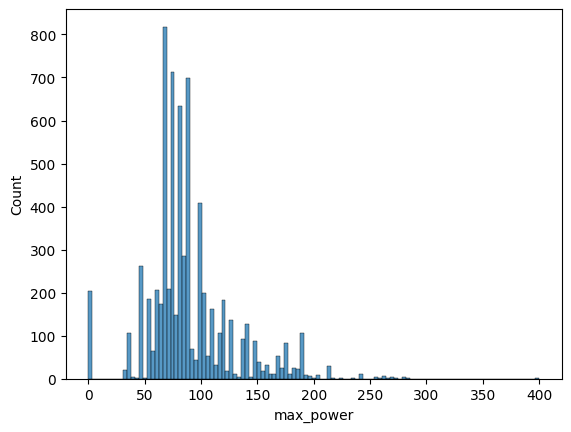

In [ ]:
sns.histplot(df['engine'])
plt.show()
sns.histplot(df['max_power'])

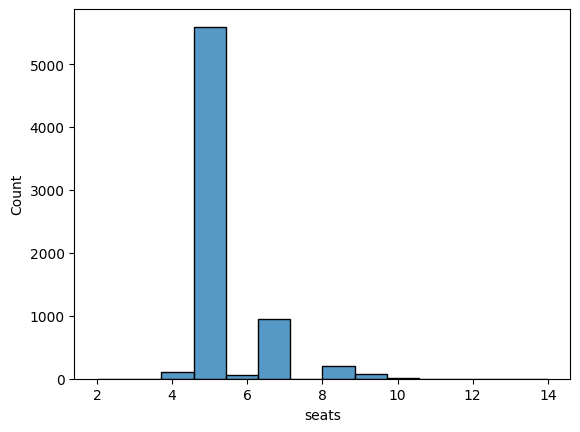

In [ ]:
sns.histplot(df['seats'])
plt.show()

In [ ]:
df['seats'].value_counts()

5.0     5595
7.0      944
8.0      208
4.0      104
9.0       72
6.0       54
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

Есть выбросы

<Axes: xlabel='fuel', ylabel='count'>

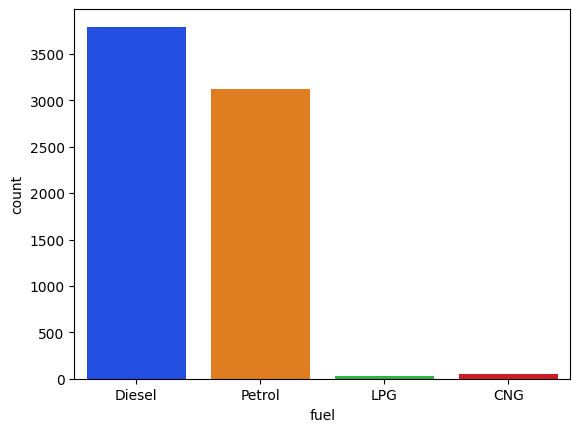

In [ ]:
sns.countplot(x='fuel', data = df, palette='bright')

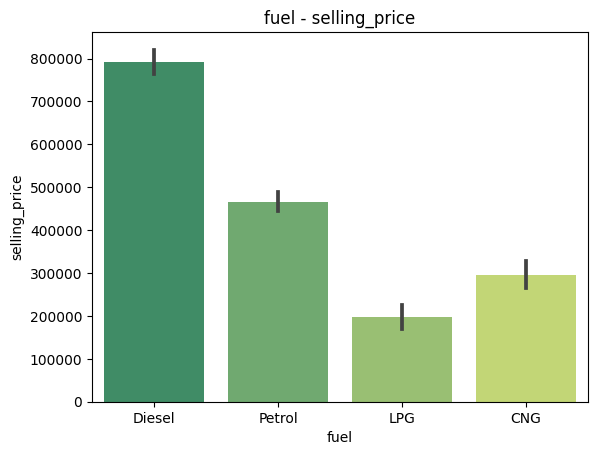

In [ ]:
sns.barplot(x='fuel', y='selling_price', data = df, palette='summer')
plt.title('fuel - selling_price')
plt.show()

<Axes: xlabel='seller_type', ylabel='count'>

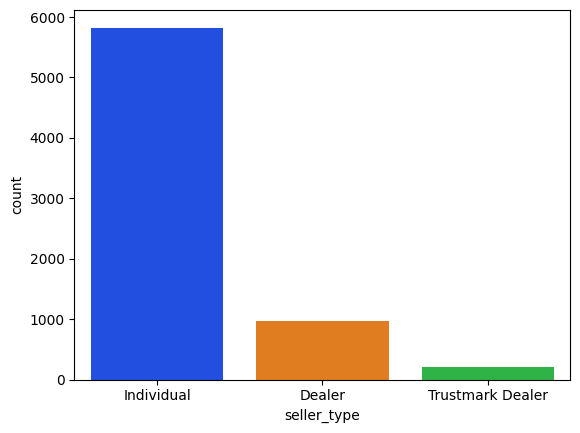

In [ ]:
sns.countplot(x='seller_type', data = df, palette='bright')

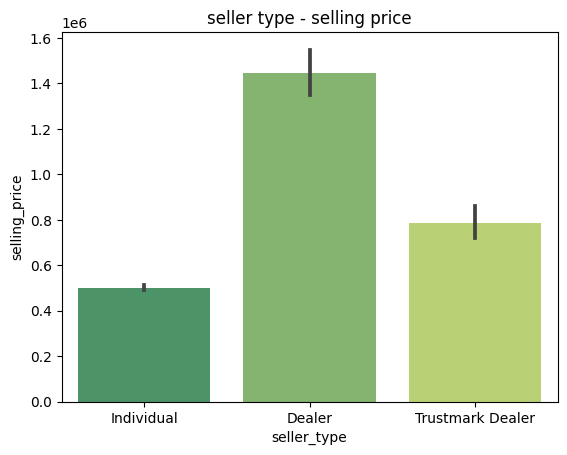

In [ ]:
sns.barplot(x='seller_type', y='selling_price', data = df, palette='summer')
plt.title('seller type - selling price')
plt.show()

<Axes: xlabel='transmission', ylabel='count'>

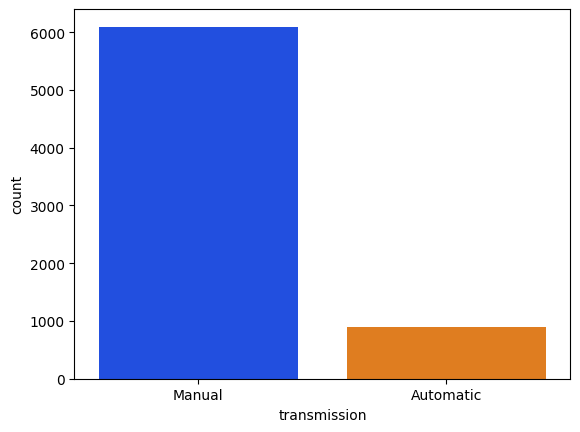

In [ ]:
sns.countplot(x='transmission', data = df, palette='bright')

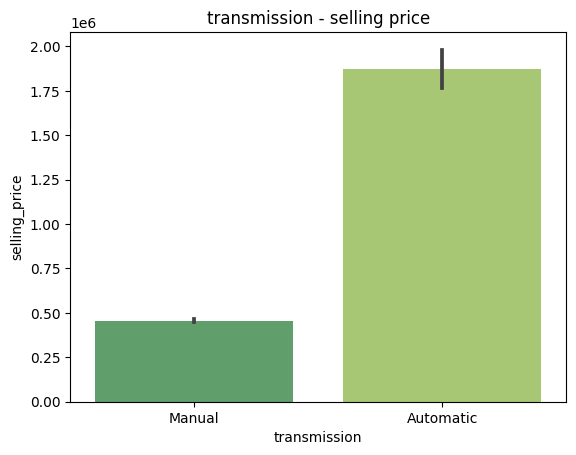

In [ ]:
sns.barplot(x='transmission', y='selling_price', data = df, palette='summer')
plt.title('transmission - selling price')
plt.show()

<Axes: xlabel='owner', ylabel='count'>

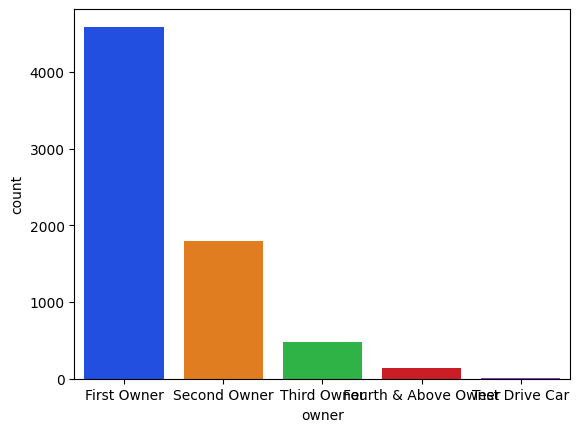

In [ ]:
sns.countplot(x='owner', data = df, palette='bright')

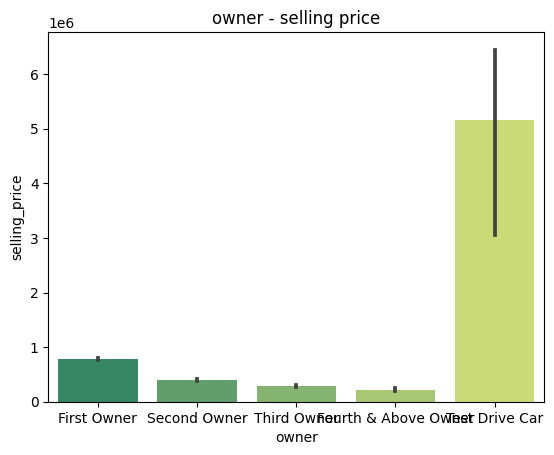

In [ ]:
sns.barplot(x='owner', y='selling_price', data = df, palette='summer')
plt.title('owner - selling price')
plt.show()

* Видим, что на цену влияют все показатели

## Машинное обучение

Данная задача представляет собой задачу множественной линейной регрессии, так как нужно предсказать стоимость при учете нескольких параметров

### Обучение без масштабирования и кодирования категориальных признаков

In [ ]:
X = df.drop(['selling_price'], axis=1) #матрица объект-признак

y = df['selling_price'] # целевая переменная (target)

X.head(3)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0


In [ ]:
y.head(3)

0    450000
1    370000
2    225000
Name: selling_price, dtype: int64

In [ ]:
X.drop(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'torque'], axis=1, inplace=True)
X.head(3)

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248.0,74.00,5.0
1,2014,120000,21.14,1498.0,103.52,5.0
2,2010,127000,23.00,1396.0,90.00,5.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5249, 6), (1750, 6))

In [ ]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

# model.fit(X_train, y_train)

# pred = model.predict(X_test)

In [ ]:
from sklearn.linear_model import Ridge

regr = Ridge(alpha=0.1)
regr.fit(X_train, y_train)

pred = regr.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

print("Показатели модели")
print("MAPE =", mean_absolute_percentage_error(y_test, pred)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred)) # наилучшее - 1.0

Показатели модели
MAPE = 0.9520867212269577
MAE = 330076.0390160288
R^2 = 0.5717296136106562


In [ ]:
regr.coef_

array([ 4.83869274e+04, -1.34890727e+00, -2.94267245e+04, -1.53212627e+02,
        1.54269486e+04, -7.08929228e+04])

In [ ]:
importances = pd.DataFrame({'weights': regr.coef_, 'features': X_train.columns}).sort_values(by='weights')
importances.head(10)

,weights,features
5,-70892.922845,seats
2,-29426.724460,mileage
3,-153.212627,engine
1,-1.348907,km_driven
4,15426.948583,max_power
0,48386.927405,year


In [ ]:
import pickle

with open('modelllllllll.pickle', 'wb') as f:
    pickle.dump(regr, f)

### Обучение с масштабированием и One Hot Encoding

In [ ]:
df['selling_price'].skew()

4.210755727853011

Распределение цен далеко от нормального и смещено вправо. Прологарифмируем их



Text(0.5, 1.0, 'log_prices with skew 0.2442653909588964')

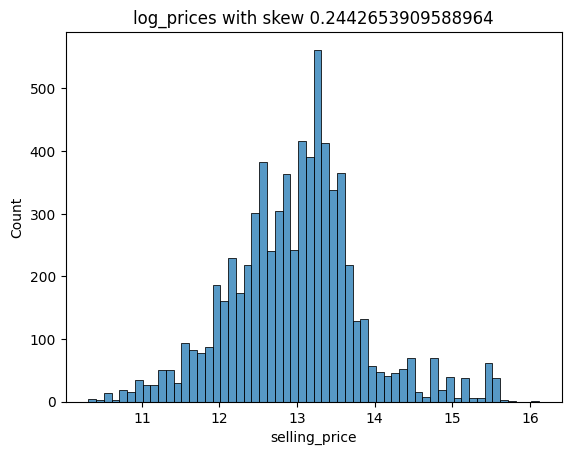

In [ ]:
prices_log = np.log(df['selling_price'])
sns.histplot(prices_log)
plt.title(f'log_prices with skew {prices_log.skew()}')


Закодируем категориальные признаки fuel, seller_type, transmission, owner

In [ ]:
df[['fuel', 'seller_type', 'transmission', 'owner']].nunique()

fuel            4
seller_type     3
transmission    2
owner           5
dtype: int64

In [ ]:
pd.get_dummies(df['fuel'])

,CNG,Diesel,LPG,Petrol
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
6994,0,0,0,1
6995,0,1,0,0
6996,0,1,0,0
6997,0,1,0,0


In [ ]:
X = X.join(pd.get_dummies(df['fuel']))
X = X.join(pd.get_dummies(df['seller_type']))
X = X.join(pd.get_dummies(df['transmission']))
X = X.join(pd.get_dummies(df['owner']))
X.head()

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,145500,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,2014,120000,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,2010,127000,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
3,2007,120000,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2017,45000,20.14,1197.0,81.86,5.0,0,0,0,1,0,1,0,0,1,1,0,0,0,0


In [ ]:
X[X.columns[6:]].sum()

CNG                       52
Diesel                  3793
LPG                       34
Petrol                  3120
Dealer                   967
Individual              5826
Trustmark Dealer         206
Automatic                904
Manual                  6095
First Owner             4587
Fourth & Above Owner     144
Second Owner            1791
Test Drive Car             4
Third Owner              473
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(X) # вычислить min, max по каждому столбцу

X = pd.DataFrame(ss.transform(X), columns=X.columns)

X.head()

,year,km_driven,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,0.837838,0.061640,0.557143,0.346106,0.18500,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.837838,0.050837,0.503333,0.415492,0.25880,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.729730,0.053803,0.547619,0.387182,0.22500,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.648649,0.050837,0.383333,0.359983,0.22050,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.918919,0.019064,0.479524,0.331951,0.20465,0.25,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((5249, 20), (1750, 20))

In [ ]:
# y_train = np.log(y_train)
# y_test = np.log(y_test)

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [ ]:
# Посмотрим на показатели MAE, MAPE и R^2
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error

print("Показатели модели")
print("MAPE =", mean_absolute_percentage_error(y_test, pred)) # наилучшее - 0.0
print("MAE =", mean_absolute_error(y_test, pred)) # наилучшее - 0.0
print("R^2 =", r2_score(y_test, pred)) # наилучшее - 1.0

Показатели модели
MAPE = 0.7932452533816852
MAE = 282861.7172569959
R^2 = 0.6473683893343418


Все показатели существенно улучшились!

In [ ]:
importances = pd.DataFrame({'weights': model.coef_, 'features': X_train.columns}).sort_values(by='weights')
importances.head(30)

,weights,features
1,-3.110962e+06,km_driven
2,-1.013270e+06,mileage
3,-6.752487e+05,engine
5,-5.472609e+05,seats
17,-5.084465e+05,Second Owner
16,-4.950005e+05,Fourth & Above Owner
15,-4.634724e+05,First Owner
19,-4.597508e+05,Third Owner
14,-2.513400e+05,Manual
9,-1.797906e+05,Petrol


In [ ]:
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# а так модель можно загрузить из файла:
# with open('model.pickle', 'rb') as f:
#     model = pickle.load(f)